In [2]:
import numpy as np
import matplotlib.pyplot as plt

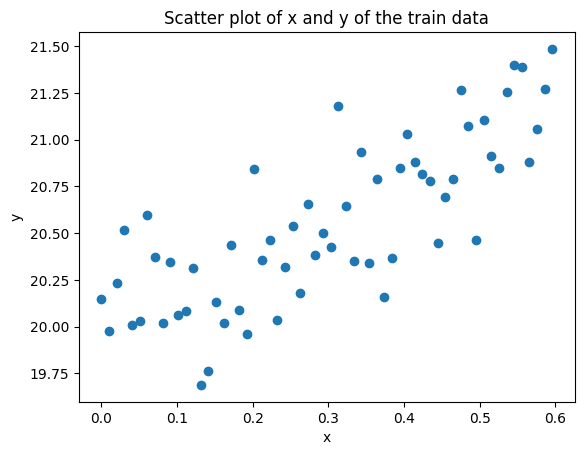

In [3]:
# a.Візуалізувати дані з lab1_train.csv.

train_data = np.genfromtxt("lab_1_train.csv", delimiter=",", skip_header=1)
x_train = train_data[:, 1]
y_train = train_data[:, 2]

plt.scatter(x_train, y_train)
plt.title('Scatter plot of x and y of the train data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
def mean_squared_error(actual_values, predicted_values):
    if len(actual_values) != len(predicted_values):
        raise ValueError("Input lists must have the same length.")

    squared_errors = [(actual - predicted) ** 2 for actual, predicted in zip(actual_values, predicted_values)]
    mse = sum(squared_errors) / len(actual_values)
    
    return mse

def linear_regression(x, m, b):
    return m * x + b

def compute_gradients(x, y, m, b):
    y_pred = linear_regression(x, m, b)
    dm = (1/len(x)) * np.sum((y_pred - y) * x)
    db = (1/len(x)) * np.sum(y_pred - y)
    return dm, db

m = 0
b = 0
learning_rate = 0.01
convergence_threshold = 1e-3
iterations = 1000
prev_mse = float('inf')

for epoch in range(iterations):
    dm, db = compute_gradients(x_train, y_train, m, b)
    m = m - learning_rate * dm
    b = b - learning_rate * db

    # b. Після кожної епохи виводити поточні значення ваг та функції втрат. Використовувати Mean Squared Error як функцію втрат.
    mse = mean_squared_error(linear_regression(x_train, m, b), y_train)
    print(f"Epoch {epoch + 1}/{iterations}, MSE: {mse}, Weights: {m, b}")
    if abs(prev_mse - mse) < convergence_threshold:
        print("Converged.")
        break
    
    prev_mse = mse

Epoch 1/1000, MSE: 413.31715515958723, Weights: (0.06183906732682434, 0.20549563191038453)
Epoch 2/1000, MSE: 404.3557535251843, Weights: (0.12299196792752087, 0.40875203957377215)
Epoch 3/1000, MSE: 395.5888804625636, Weights: (0.18346619347012755, 0.6097936598708571)
Epoch 4/1000, MSE: 387.0123131555248, Weights: (0.243269153861219, 0.8086446629898695)
Epoch 5/1000, MSE: 378.62192045660646, Weights: (0.3024081781382132, 1.0053289553371325)
Epoch 6/1000, MSE: 370.41366089714313, Weights: (0.3608905153519401, 1.199870182415855)
Epoch 7/1000, MSE: 362.3835807405215, Weights: (0.4187233354395782, 1.392291731673507)
Epoch 8/1000, MSE: 354.52781207769675, Weights: (0.47591373008806426, 1.5826167353181193)
Epoch 9/1000, MSE: 346.8425709640502, Weights: (0.5324687135880805, 1.770868073103848)
Epoch 10/1000, MSE: 339.3241555966928, Weights: (0.5883952236787213, 1.9570683750861386)
Epoch 11/1000, MSE: 331.96894453133575, Weights: (0.643700122382942, 2.1412400243468213)
Epoch 12/1000, MSE: 324.

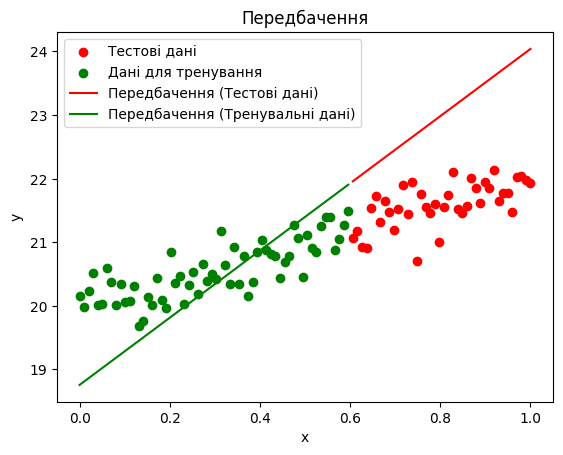

In [5]:
test_data = np.loadtxt('lab_1_test.csv', delimiter=',', skiprows=1)
x_test = test_data[:, 1]
y_test = test_data[:, 2]

# Передбачення на тестових даних
predictions_test = linear_regression(x_test, m, b)

# Передбачення на тренувальних даних
predictions_train = linear_regression(x_train, m, b)

# d. Візуалізувати на одному графіку дані з lab1_train.csv,  lab1_test.csv та лінію, до якої зійшовся розв’язок.
plt.scatter(x_test, y_test, color='red', label='Тестові дані')
plt.scatter(x_train, y_train, color='green', label='Дані для тренування')
plt.plot(x_test, predictions_test, color='red', label='Передбачення (Тестові дані)')
plt.plot(x_train, predictions_train, color='green', label='Передбачення (Тренувальні дані)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Передбачення')
plt.legend()
plt.show()

In [6]:
# c. Після того, як градієнтний спуск зійшовся, порахувати функцію втрат на тестових даних з lab1_test.csv.
mse_test = mean_squared_error(predictions_test, y_test)
print(f'Mean Squared Error on Test Set: {mse_test}')

Mean Squared Error on Test Set: 2.196902572823799
